## TELCO CUSTOMER CHURN ANALYSIS PROJECT

This project analyzes customer churn for a telecommunications company that provides:
> - Phone services
> - Internet services
> - Streaming services
> - Monthly subscription

Each row in the dataset is a customer.

### 📌 Understanding Customer Churn

The **`Churn`** column in the dataset tells us whether a customer left the company.

#### What is Churn?

**Churn** means a customer **cancels their subscription or stops using the service**.

In this dataset:

- **Yes** → Customer **churned** (left the company)  
- **No** → Customer was **retained** (stayed with the company)

---

### 📊 Why Churn Matters

For telecom companies and subscription-based businesses:

- Acquiring a **new customer is much more expensive** than keeping an existing one.
- When customers churn, the company loses money.

Churn directly affects:

- **Revenue**
- **Profit**
- **Market share**
- **Company valuation**

High churn means a company is losing customers faster than it can replace them.

---

### 🎯 Goal of This Project

The goal of this project is to:

> **Use customer data to predict which customers are likely to churn so the company can take action before they leave.**

This is exactly how real companies like **MTN, Airtel, Vodafone, banks, fintechs, Netflix, and other subscription businesses** use data science — to identify at-risk customers and reduce losses.


In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns',None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
# Import the Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier 
# import pipelines
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline  # important: from imblearn, not sklearn
from imblearn.over_sampling import SMOTE
# import metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, average_precision_score,
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
)

In [2]:
# importing the performance dataset
df = pd.read_csv('Telco-Customer-Churn 2.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# size of the dataset
df.shape

(7043, 21)

In [4]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# listing out all the columns for 
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# checking the number of missing values in our dataset
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# fixing of datatype problem
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## VALIDATING TARGET COLUMN

<Axes: xlabel='Churn'>

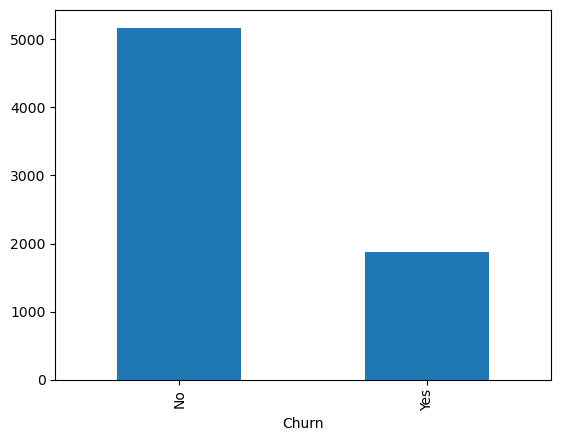

In [9]:
# Target Column 
df.Churn.value_counts().plot(kind='bar')

In [10]:
# Convert 'Yes' to 1 and 'No' to 0
df.Churn = (df.Churn == 'Yes').astype(int)

In [11]:
# unique value of the target column
df.Churn.unique()

array([0, 1])

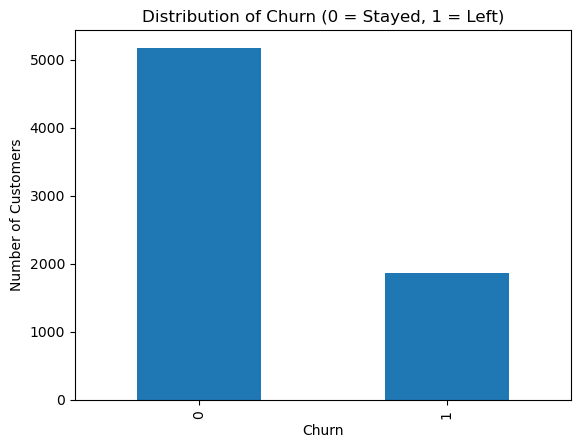

In [12]:
df["Churn"].value_counts().plot(kind="bar")

plt.title("Distribution of Churn (0 = Stayed, 1 = Left)")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")

plt.show()

In [13]:
# Calculate percentage distribution of churn
churn_percentages = df["Churn"].value_counts(normalize=True) * 100

print(churn_percentages)

Churn
0   73.46
1   26.54
Name: proportion, dtype: float64


## EXPLORATORY DATA ANALYSIS

**`Goals:`**
> - Compare Churn vs non-churn comparison
> - Usage, tenure, and engagement patterns

In [14]:
# Handle missing referredby (too many missing to be useful)
df.drop('customerID', axis=1, inplace=True) 

In [15]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

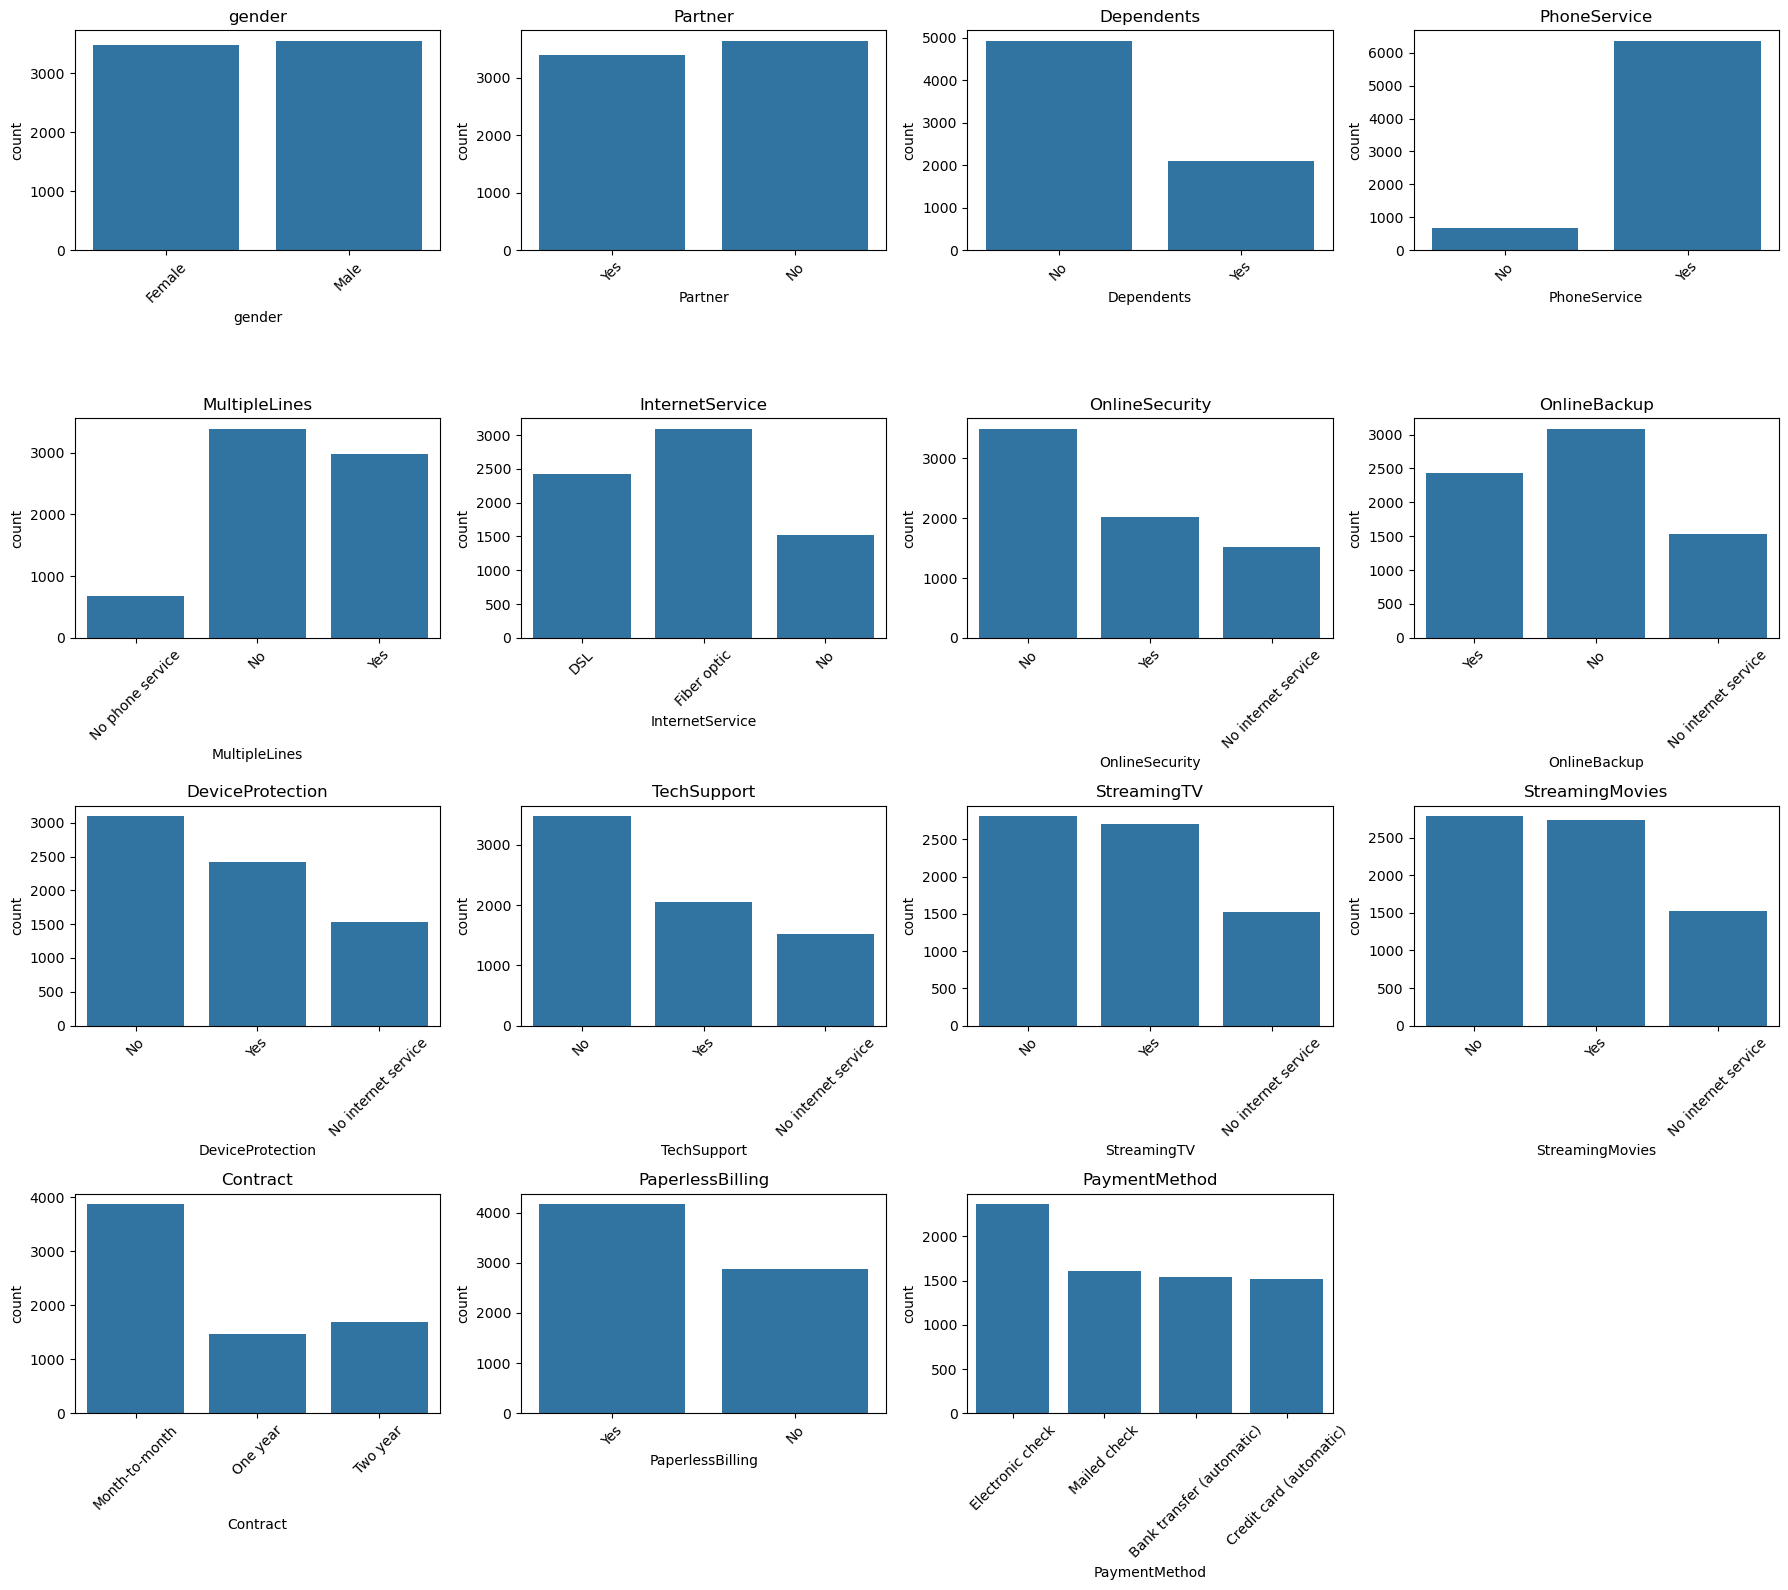

In [16]:
# visualize the categorical columns
fig, axes = plt.subplots(4, 4, figsize=(18, 16))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

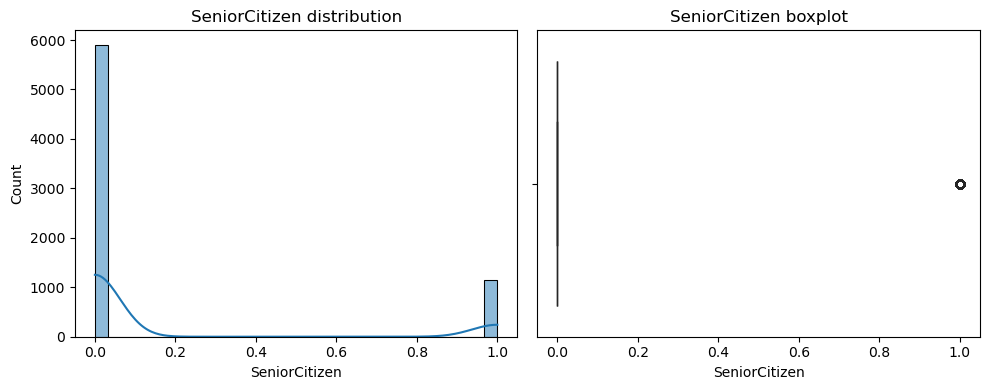

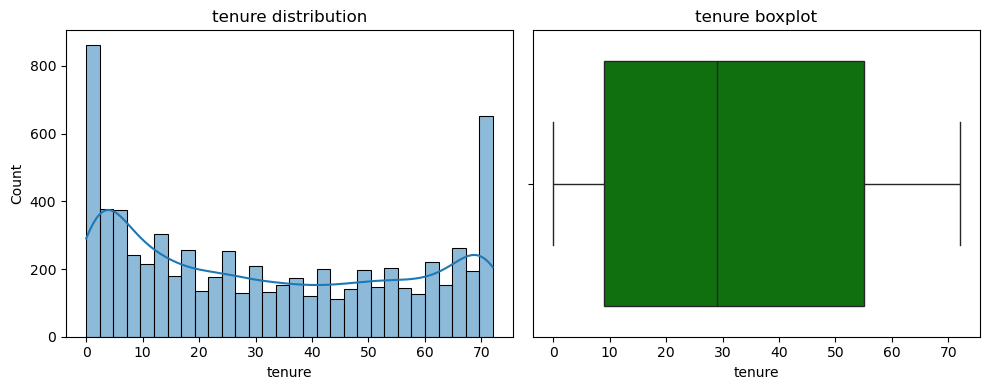

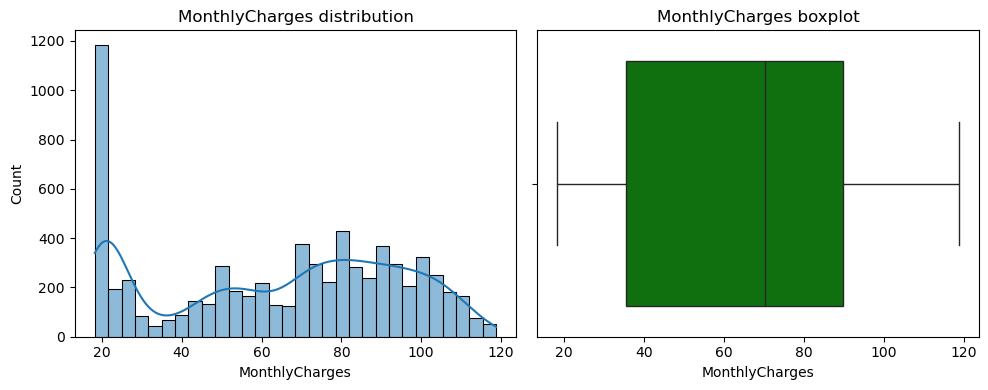

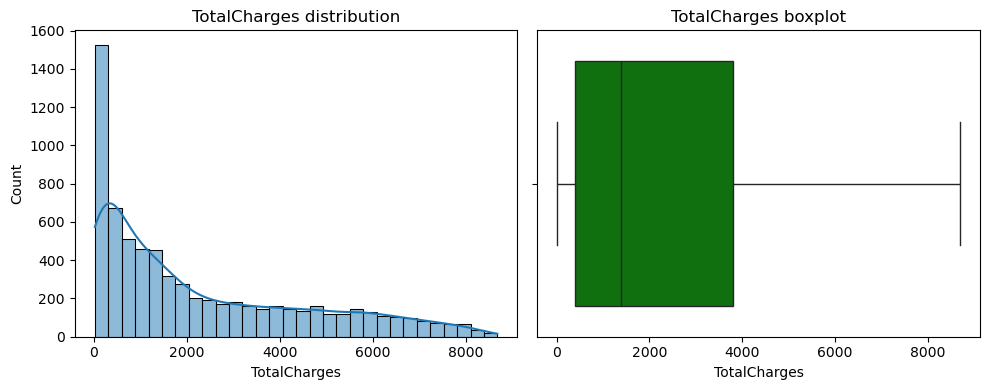

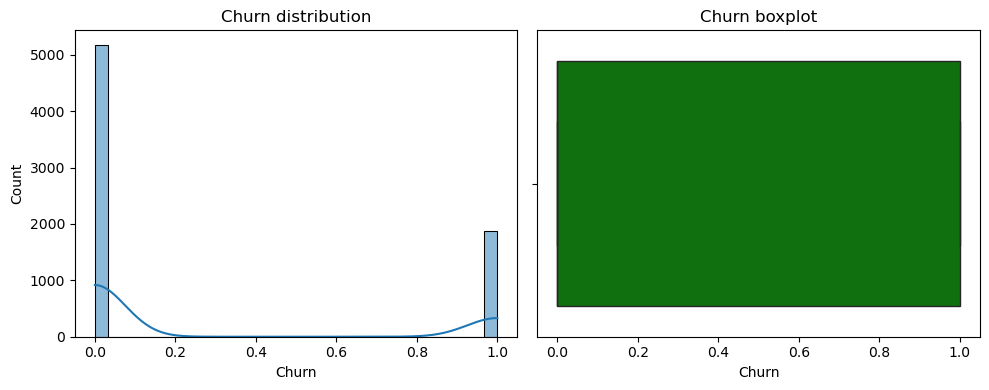

In [17]:
# visualize the numerical columns
for col in num_cols:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'{col} distribution')
    plt.xlabel(col)
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    sns.boxplot(x = df[col], color='green')
    plt.title(f'{col} boxplot')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

## FEATURE ENGINEERING

We move to create new features that captures customer behavior:
- `tenure_group`
- `service_count`
- `avg_monthly_spend`

In [18]:
# bins and labels for tenure_group
bins = [0,12,24,48,60,72]
labels = ['0-1yr','1-2yrs','2-4yrs','4-5yrs','5-6yrs']

# tenure_group column
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels)

In [19]:
# List of service columns (binary: Yes/No)
service_cols = ['PhoneService', 'InternetService', 'OnlineSecurity', 
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                'StreamingTV', 'StreamingMovies']

# Count number of services
df['service_count'] = df[service_cols].apply(lambda x: sum(x == 'Yes'), axis=1)

In [20]:
# Handle missing or zero tenure
df['avg_monthly_spend'] = df['TotalCharges'] / df['tenure'].replace(0,1)

# Optional: round to 2 decimals
df['avg_monthly_spend'] = df['avg_monthly_spend'].round(2)

### THE DESCRIPTIVE STATISTICS AND CORRELATION MATRIX

In [21]:
# descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
tenure,7043.00,32.37,24.56,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.00,64.76,30.09,18.25,35.50,70.35,89.85,118.75
TotalCharges,7032.00,2283.30,2266.77,18.80,401.45,1397.47,3794.74,8684.80
Churn,7043.00,0.27,0.44,0.00,0.00,0.00,1.00,1.00
service_count,7043.00,2.94,1.84,0.00,1.00,3.00,4.00,7.00
avg_monthly_spend,7032.00,64.80,30.19,13.78,36.18,70.38,90.18,121.40


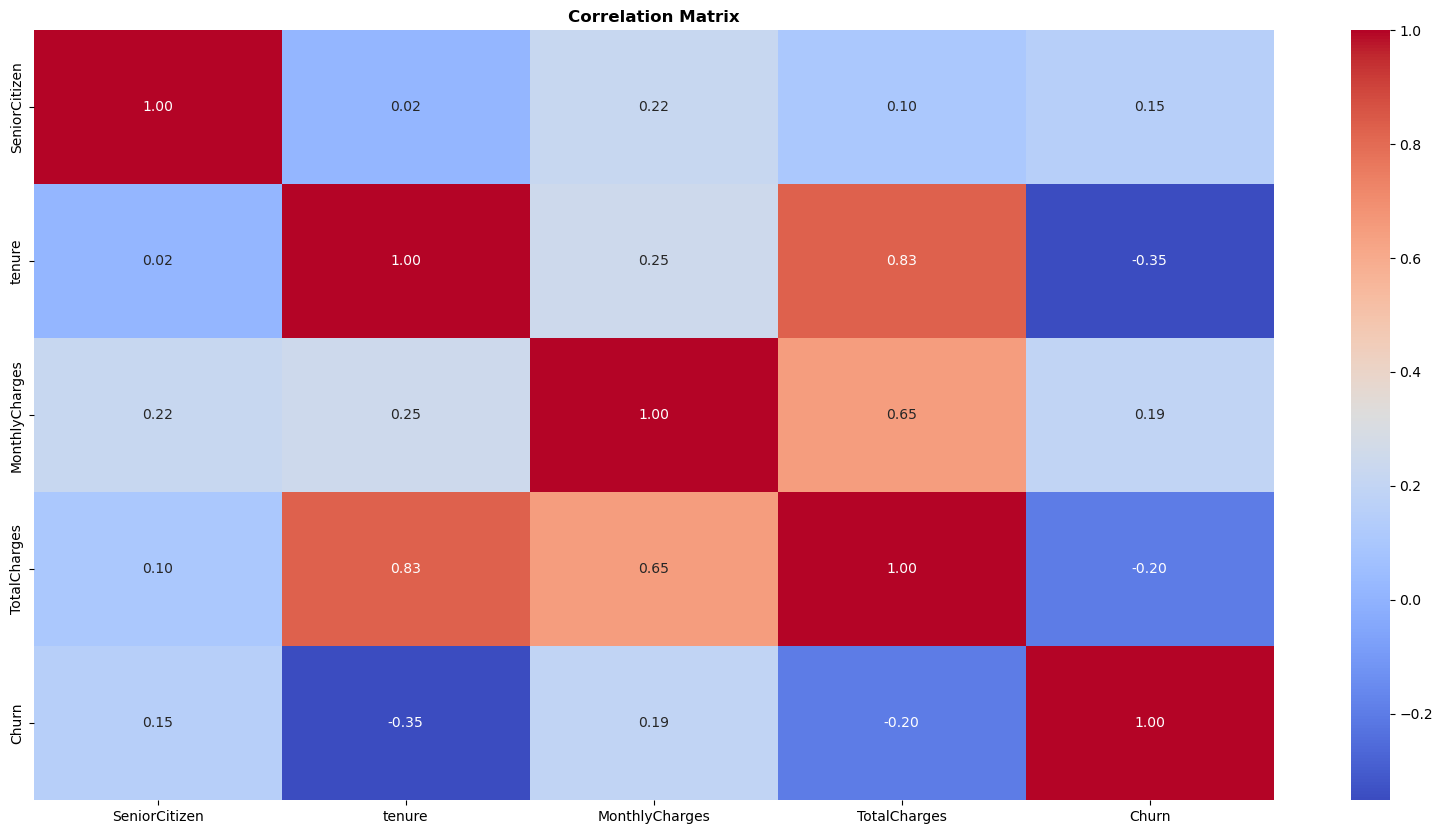

In [22]:
# checking correlation matrix
heatmap = df[num_cols].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(data=heatmap, fmt=".2f", annot=True, cmap="coolwarm")
plt.title("Correlation Matrix", fontweight="bold")
plt.show()

# DATA PREPARATION

In [23]:
# viewing the columns
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_group',
       'service_count', 'avg_monthly_spend'],
      dtype='object')

In [24]:
# separate the features and target
X = df.drop(columns='Churn')
y = df['Churn']

In [25]:
# separate into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

# DATA PREPROCESSING

In [26]:
# split into cat and num cols
num_cols = X.select_dtypes(include=np.number).columns.tolist()
cat_cols = X.select_dtypes(include='object').columns.tolist()

In [27]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [28]:
num_cols

['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'service_count',
 'avg_monthly_spend']

### DATA PREPROCESSING USING A COLUMN TRANSFORMER

In [29]:
# COLUMN TRANSFORMER PIPELINE
# Numeric transformer
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # safe guard
    ('scaler', StandardScaler())
])
# Cstegorical transformer
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # safe guard
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])

In [30]:
# Column transformer
preprocessor = ColumnTransformer(transformers=[
    ('scaled_num', num_transformer, num_cols),
    ('encoded_cat', cat_transformer, cat_cols),
])

In [31]:
preprocessor

ColumnTransformer(transformers=[('scaled_num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['SeniorCitizen', 'tenure', 'MonthlyCharges',
                                  'TotalCharges', 'service_count',
                                  'avg_monthly_spend']),
                                ('encoded_cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

In [32]:
# Models wrapped in pipelines
models = {
    'Logistic Regression': Pipeline([
        ('preprocess', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000))
    ]),
    
    'Random Forest': Pipeline([
        ('preprocess', preprocessor),
        ('classifier', RandomForestClassifier(random_state=2))
    ])
}


Detailed Classification Report for Logistic Regression:
              precision    recall  f1-score   support

  0 (Stayed)       0.85      0.89      0.87      1035
    1 (Left)       0.66      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409


Detailed Classification Report for Random Forest:
              precision    recall  f1-score   support

  0 (Stayed)       0.83      0.89      0.86      1035
    1 (Left)       0.63      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



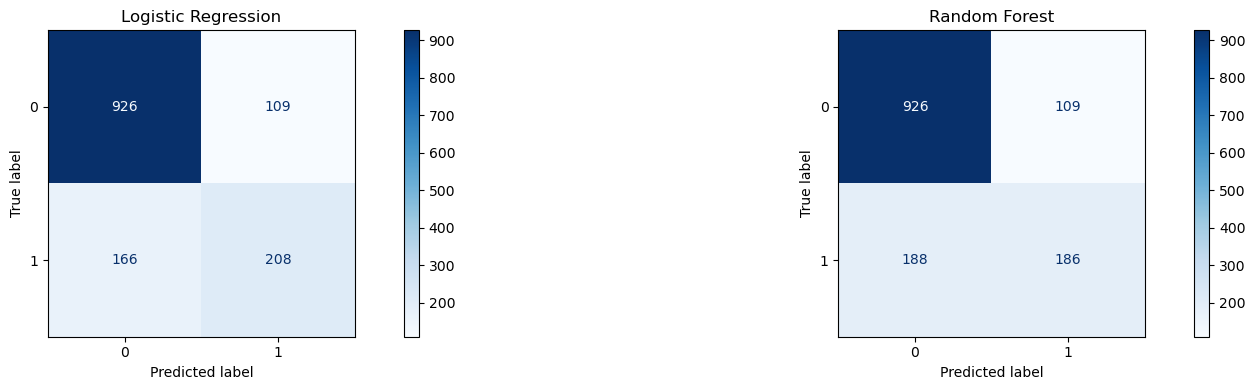


Summary Classification Metrics
                 Logistic Regression  Random Forest
Train Accuracy                  0.81           1.00
Test Accuracy                   0.80           0.79
Precision Score                 0.66           0.63
Recall Score                    0.56           0.50
F1 Score                        0.60           0.56
ROC AUC                         0.84           0.82


In [33]:
# Using for loop to evaluate our models
results = {}
fig, axes = plt.subplots(1, 2, figsize=(18, 4))  # adjust 1,2 if you have more models

for (name, model), ax in zip(models.items(), axes.flatten()):
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Compute metrics
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    precision = precision_score(y_test, test_pred)
    recall = recall_score(y_test, test_pred)
    f1 = f1_score(y_test, test_pred)

    # ROC-AUC
    if hasattr(model.named_steps['classifier'], "predict_proba"):
        test_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, test_pred_proba)
    else:
        roc_auc = None

    # Store metrics
    results[name] = {
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Precision Score": precision,
        "Recall Score": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    }

    # Plot confusion matrix
    cm = confusion_matrix(y_test, test_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax=ax, cmap='Blues')
    ax.set_title(name)

    # Print detailed classification report
    print(f"\nDetailed Classification Report for {name}:")
    print("=" * 60)
    print(classification_report(y_test, test_pred, target_names=['0 (Stayed)', '1 (Left)']))

plt.tight_layout()
plt.show()

# Print summary metrics
print('\nSummary Classification Metrics')
metrics_df = pd.DataFrame(results)
print(metrics_df.round(2))

## FEATURE IMPORTANCE USING SHAP

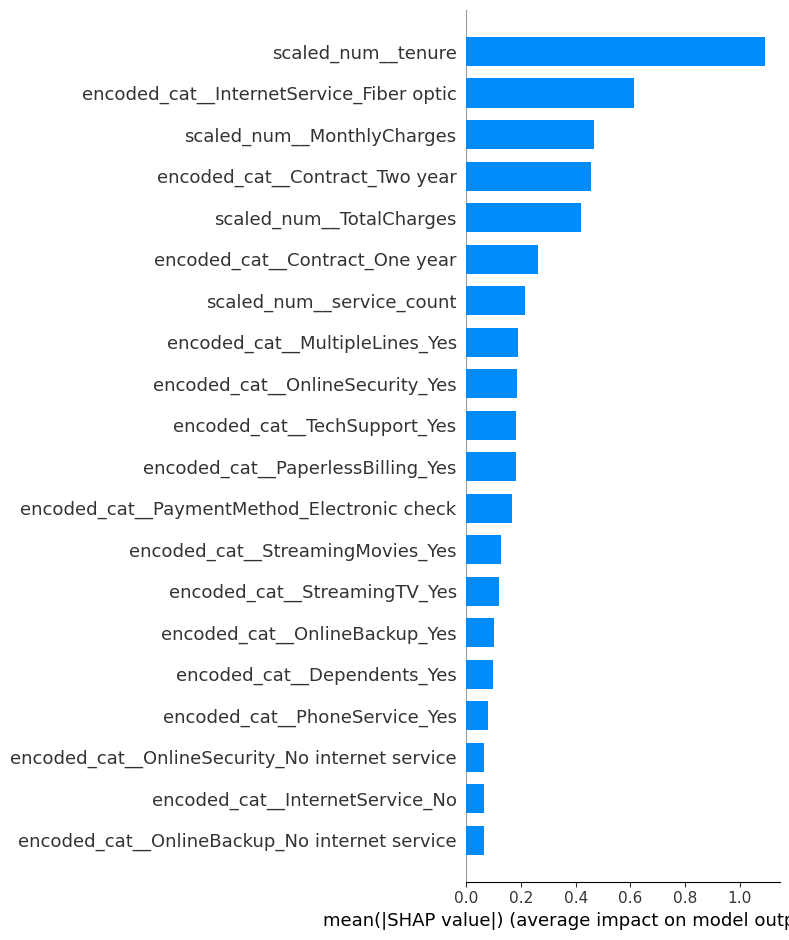

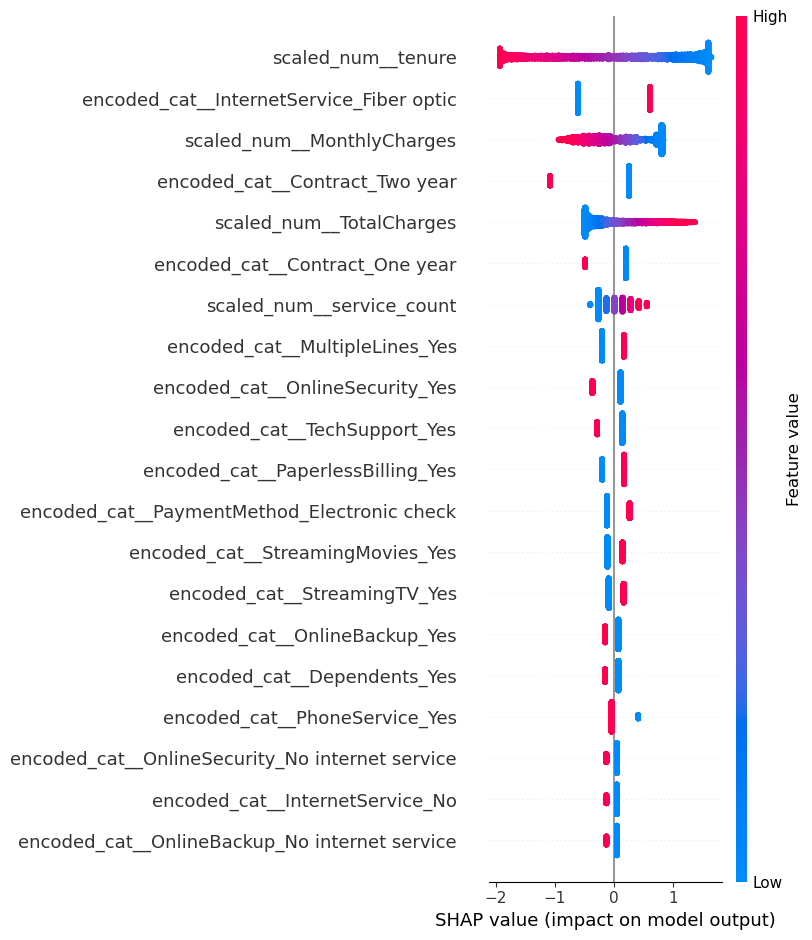

In [34]:
import shap

pipeline = models["Logistic Regression"]
pipeline.fit(X_train, y_train)

log_model = pipeline.named_steps["classifier"]

X_train_processed = pipeline[:-1].transform(X_train)

feature_names = pipeline[:-1].get_feature_names_out()

X_train_processed_df = pd.DataFrame(
    X_train_processed,
    columns=feature_names
)

explainer = shap.LinearExplainer(
    log_model,
    X_train_processed_df,
    feature_perturbation="interventional"
)

shap_values = explainer.shap_values(X_train_processed_df)

shap.summary_plot(shap_values, X_train_processed_df, plot_type="bar")

shap.summary_plot(shap_values, X_train_processed_df)

#### Post-Dictive Churn Analysis
We compare actual vs predicted churn at the segment level.

In [35]:
# Use the best model (e.g Logistic Regression)
best_model = models["Logistic Regression"]

# Fit model
best_model.fit(X_train, y_train)

# Predictions on TEST set
test_pred = best_model.predict(X_test)
test_prob = best_model.predict_proba(X_test)[:, 1]

# Build Post-Predictive DataFrame
test_df = X_test.copy()
test_df["Actual"] = y_test.values
test_df["Predicted"] = test_pred
test_df["Churn_Probability"] = test_prob

test_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_group,service_count,avg_monthly_spend,Actual,Predicted,Churn_Probability
437,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),114.05,8468.20,5-6yrs,7,117.61,0,0,0.04
2280,Female,1,No,No,8,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),100.15,908.55,0-1yr,4,113.57,0,1,0.69
2235,Female,0,Yes,Yes,41,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,No,One year,Yes,Credit card (automatic),78.35,3211.20,2-4yrs,5,78.32,0,0,0.06
4460,Male,0,Yes,No,18,Yes,No,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,78.20,1468.75,1-2yrs,3,81.60,0,0,0.40
3761,Female,0,Yes,No,72,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),82.65,5919.35,5-6yrs,6,82.21,0,0,0.02
